Projet : Accident de la route
==============

## Etape 3 : Modélisation

### Import des données

In [1]:
# import des librairies
import pandas as pd
pd.set_option('display.max_columns', None)
pd.options.display.max_info_columns

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#from lazypredict.supervised import LazyClassifier
from lazypredict.Supervised import LazyClassifier


import sklearn
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score#, train_test_split
#from sklearn.feature_selection import SelectKBest, f_classif, chi2
#from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
#from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier,ExtraTreesClassifier, RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix,classification_report, f1_score, accuracy_score, recall_score, precision_score
from sklearn.neighbors import KNeighborsClassifier

import sys
import joblib

In [2]:

print("Version de Python:", sys.version)
print("Version de pandas:", pd.__version__)
print("Version de scikit-learn:", sklearn.__version__)
print("Version de pandas:", np.__version__)


Version de Python: 3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]
Version de pandas: 2.1.4
Version de scikit-learn: 1.2.2
Version de pandas: 1.26.3


In [3]:
# import du dataset
df_train = pd.read_csv("dataset/df_train.csv")
df_train.head()

df_test = pd.read_csv("dataset/df_test.csv")
df_test.head()

,place,catu,grav,sexe,trajet,secu1,locp,catr,circ,nbv,vosp,prof,plan,surf,infra,situ,vma,lum,com,agg,int,atm,col,lat,long,senc,catv,obs,obsm,choc,manv,motor,age_group,h_group,weekday,index
0,1,1,1,2,5,1,0,4,-1,2,0,1,1,1,0,1,50,5,66136,2,2,1,3,42.70,2.89,1,6,0,2,7,1,1,4,2,5,422246
1,5,2,1,2,0,1,-1,7,2,4,0,2,1,1,0,1,50,5,13215,2,1,1,3,43.37,5.35,0,3,0,2,7,1,1,6,1,2,176315
2,1,1,1,1,4,1,-1,1,1,2,0,1,3,1,0,1,80,1,69283,1,1,1,5,45.67,4.94,2,5,0,2,1,13,1,4,6,1,236564
3,1,1,0,2,9,1,0,1,3,4,0,1,1,2,0,1,130,3,87014,1,1,2,5,46.09,1.36,2,6,1,0,3,2,1,7,7,6,262438
4,1,1,1,1,5,1,0,1,3,1,0,1,1,1,8,1,70,1,67462,1,1,1,2,48.29,7.46,1,3,4,2,1,1,1,3,6,5,182769


### Séparation des données

In [4]:
X_train = df_train.drop(["grav","index"], axis=1)
y_train = df_train.grav

X_test = df_test.drop(["grav","index"], axis=1)
y_test = df_test.grav

### Aperçu  de la performance relative des différents modèles de classification

In [5]:

models_list = [AdaBoostClassifier,XGBClassifier,LGBMClassifier,KNeighborsClassifier, ExtraTreesClassifier]


In [6]:
# Initialiser LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None,
                     predictions=True, classifiers=models_list)

# Entrainer et évaluer les modèles
models_train, predictions_train = clf.fit(X_train, X_test, y_train, y_test)
models_test, predictions_test = clf.fit(X_train, X_test, y_train, y_test)
# Afficher les résultats
print(models_list)


 40%|████      | 2/5 [00:15<00:19,  6.46s/it]

[LightGBM] [Info] Number of positive: 212781, number of negative: 152361
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013936 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1070
[LightGBM] [Info] Number of data points in the train set: 365142, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.582735 -> initscore=0.334011
[LightGBM] [Info] Start training from score 0.334011


100%|██████████| 5/5 [01:12<00:00, 14.49s/it]


'tuple' object has no attribute '__name__'
Invalid Classifier(s)


 40%|████      | 2/5 [00:15<00:19,  6.64s/it]

[LightGBM] [Info] Number of positive: 212781, number of negative: 152361
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012716 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1070
[LightGBM] [Info] Number of data points in the train set: 365142, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.582735 -> initscore=0.334011
[LightGBM] [Info] Start training from score 0.334011


100%|██████████| 5/5 [01:12<00:00, 14.49s/it]

[<class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>, <class 'xgboost.sklearn.XGBClassifier'>, <class 'lightgbm.sklearn.LGBMClassifier'>, <class 'sklearn.neighbors._classification.KNeighborsClassifier'>, <class 'sklearn.ensemble._forest.ExtraTreesClassifier'>]


In [7]:
models_train

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.81,0.81,0.81,0.81,1.35
ExtraTreesClassifier,0.81,0.81,0.81,0.81,46.28
LGBMClassifier,0.81,0.80,0.80,0.81,1.27
AdaBoostClassifier,0.79,0.79,0.79,0.79,13.77
KNeighborsClassifier,0.75,0.75,0.75,0.75,9.75


In [8]:
# Sauvegarder les résultats
joblib.dump(models_train, 'models_saved/lazy_classifier.joblib')

['models_saved/lazy_classifier.joblib']

### Modélisation

#### Modèle Adaboost

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Meilleurs paramètres trouvés: {'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 800}
Meilleur score de validation croisée: 0.812535601304711
Matrice de confusion :
 [[30135  7956]
 [11165 42030]]


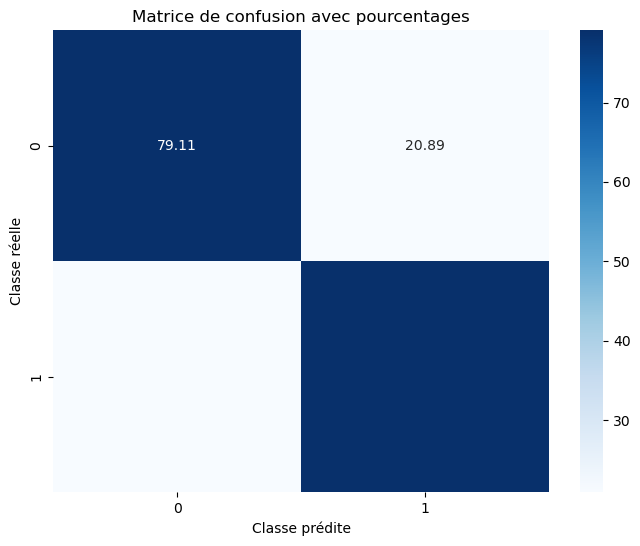

In [9]:
# model adaboost

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


hp_ada = {
    'n_estimators': [600, 700, 800],        # Nombre de classificateurs faibles
    'learning_rate': [0.01, 0.1],     # Taux d'apprentissage : ajuste la contribution de chaque classificateur faible à la prédiction finale
    'algorithm': ['SAMME.R']      # Algorithme utilisé: 'SAMME.R'
}

dtc = DecisionTreeClassifier(random_state=42, max_depth=1)

gs_ada= GridSearchCV(estimator=AdaBoostClassifier(random_state=42, estimator=dtc),
                     param_grid=hp_ada,
                           cv = 5,  # Nombre de folds pour la validation croisée
                           verbose = 3, # Affiche le degré de détail des calculs
                           refit=True, # réentraine le modèle avec toutes les données
                           scoring="f1",
                           n_jobs = -1)  # Utiliser etous les cours du CPU

gs_ada.fit(X_train_scaled, y_train)

best_hp_ada = gs_ada.best_params_
best_score_ada = gs_ada.best_score_
best_estimator_ada = gs_ada.best_estimator_

print("Meilleurs paramètres trouvés:", best_hp_ada)
print("Meilleur score de validation croisée:", best_score_ada)

y_pred_ada = best_estimator_ada.predict(X_test_scaled)

cm_ada = confusion_matrix(y_test, y_pred_ada)
print("Matrice de confusion :\n", cm_ada)

#row_sums_ada = cm_ada.sum(axis = 1)
#cm_percent_ada = (cm_ada.T / row_sums_ada).T * 100

cm_percent_ada = cm_ada.astype('float') / cm_ada.sum(axis=1)[:, np.newaxis] * 100


plt.figure(figsize=(8, 6))
sns.heatmap(cm_percent_ada, annot = True, fmt = ".2f", cmap = "Blues")
plt.xlabel('Classe prédite')
plt.ylabel('Classe réelle')
plt.title('Matrice de confusion avec pourcentages')
plt.show();

#### Sauvegarde du modèle

In [10]:
# Sauvegarder le modèle
joblib.dump(best_estimator_ada, 'models_saved/best_estimator_ada_model.joblib')

['models_saved/best_estimator_ada_model.joblib']

#### Modèle Random Forest Classifier

Meilleurs paramètres trouvés: <bound method BaseEstimator.get_params of RandomForestClassifier(random_state=42)>
Matrice de confusion :
 [[30439  7652]
 [ 9267 43928]]


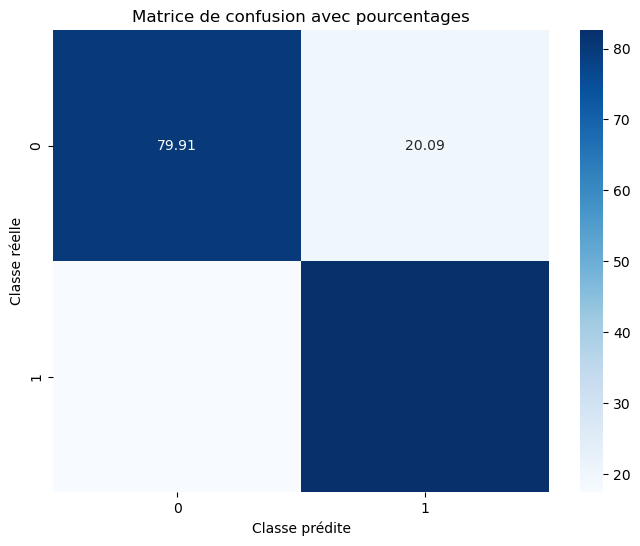

[0.03990293 0.03134351 0.0152261  0.02369087 0.01351158 0.02224427
 0.01666631 0.01396233 0.01945496 0.00625401 0.01019532 0.00980528
 0.0084554  0.01072554 0.00773937 0.02331236 0.01247187 0.05587568
 0.01158316 0.01604782 0.01177034 0.04759401 0.06056232 0.06067711
 0.01901507 0.16498982 0.03188728 0.04883438 0.03652321 0.03702645
 0.01856679 0.03529952 0.02835758 0.03042748]
F1-Score: 0.8385206394655214


In [11]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# model baseline
model = RandomForestClassifier(random_state=42).fit(X_train_scaled, y_train)
y_pred_rf_1 = model.predict(X_test_scaled)

best_hp_rf_1 = model.get_params
print("Meilleurs paramètres trouvés:", best_hp_rf_1)

cm_rf_1 = confusion_matrix(y_test, y_pred_rf_1)
print("Matrice de confusion :\n", cm_rf_1)

row_sums_rf_1 = cm_rf_1.sum(axis = 1)
cm_percent_rf_1 = (cm_rf_1.T / row_sums_rf_1).T * 100

plt.figure(figsize=(8, 6))
sns.heatmap(cm_percent_rf_1, annot = True, fmt = ".2f", cmap = "Blues")
plt.xlabel('Classe prédite')
plt.ylabel('Classe réelle')
plt.title('Matrice de confusion avec pourcentages')
plt.show();

importances_model = model.feature_importances_
print(importances_model)

accuracy_score(y_test, y_pred_rf_1)


f1 = f1_score(y_test, y_pred_rf_1, average='binary')  
print(f"F1-Score: {f1}")

In [12]:
# Sauvegarder les résultats
joblib.dump(model, 'models_saved/rf_model.joblib')

['models_saved/rf_model.joblib']

#### Modèle ExtraTreesClassifier

In [13]:
# ExtraTreesClassifier

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialiser et entraîner le modèle ExtraTreesClassifier
et_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)
et_clf.fit(X_train_scaled, y_train)

# Prédire les valeurs pour l'ensemble de test
y_pred_extrTr = et_clf.predict(X_test_scaled)

# Évaluer le modèle
accuracy_et = accuracy_score(y_test, y_pred_extrTr)
report_et = classification_report(y_test, y_pred_extrTr)

# Afficher les résultats
print(f"ExtraTreesClassifier Accuracy: {accuracy_et:.2f}")
print("\nClassification Report:")
print(report_et)

ExtraTreesClassifier Accuracy: 0.81

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.79      0.78     38091
           1       0.85      0.82      0.83     53195

    accuracy                           0.81     91286
   macro avg       0.80      0.81      0.80     91286
weighted avg       0.81      0.81      0.81     91286



Matrice de confusion :
 [[30054  8037]
 [ 9360 43835]]


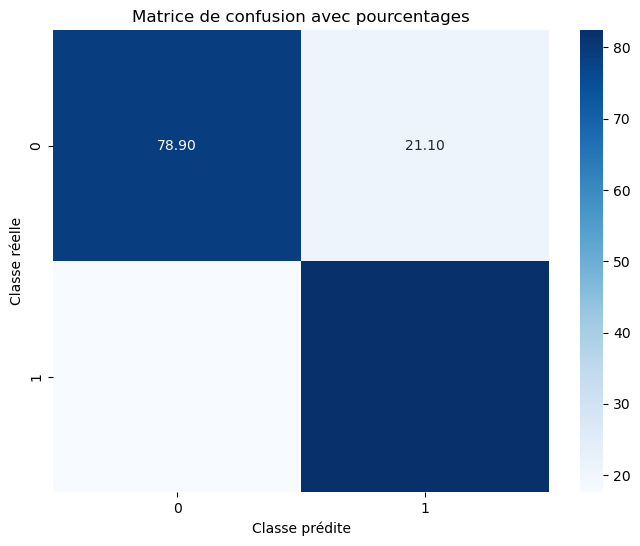

In [14]:
cm_et = confusion_matrix(y_test, y_pred_extrTr)
print("Matrice de confusion :\n", cm_et)

row_sums_et = cm_et.sum(axis = 1)
cm_percent_et = (cm_et.T / row_sums_et).T * 100

plt.figure(figsize=(8, 6))
sns.heatmap(cm_percent_et, annot = True, fmt = ".2f", cmap = "Blues")
plt.xlabel('Classe prédite')
plt.ylabel('Classe réelle')
plt.title('Matrice de confusion avec pourcentages')
plt.show();

In [15]:
# Sauvegarder le modèle
joblib.dump(et_clf, 'Brouillons/extra_tree_classifier_model.joblib')

['Brouillons/extra_tree_classifier_model.joblib']

#### Modèle XGBClassifier

In [16]:
# XGBClassifier

# Initialiser et entraîner le modèle XGBClassifier
xgb_clf = XGBClassifier(use_label_encoder=False)
xgb_clf.fit(X_train, y_train)

# Prédire les valeurs pour l'ensemble de test
y_pred_xgb = xgb_clf.predict(X_test)

# Évaluer le modèle
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
report_xgb = classification_report(y_test, y_pred_xgb)
# Afficher les résultats
print(f"XGBClassifier Accuracy: {accuracy_xgb:.2f}")
print("\nClassification Report:")
print(report_xgb)

XGBClassifier Accuracy: 0.81

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.79      0.78     38091
           1       0.84      0.83      0.84     53195

    accuracy                           0.81     91286
   macro avg       0.81      0.81      0.81     91286
weighted avg       0.81      0.81      0.81     91286



In [17]:
# Sauvegarder le modèle
joblib.dump(xgb_clf, 'models_saved/GBClassifier_model.joblib')

['models_saved/GBClassifier_model.joblib']

#### Modèle LGBMClassifier

In [18]:
# LGBMClassifier

# LightGBM : lightgbm.LGBMClassifier
# Initialiser et entraîner le modèle LightGBM
lig_clf = LGBMClassifier(use_label_encoder=False, eval_metric='logloss')
lig_clf.fit(X_train, y_train)

# Prédire les valeurs pour l'ensemble de test
y_pred_lgbm = lig_clf.predict(X_test)

# Évaluer le modèle
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
report_lgbm = classification_report(y_test, y_pred_lgbm)

# Afficher les résultats
print(f"LGBMClassifier Accuracy: {accuracy_lgbm:.2f}")
print("\nClassification Report:")
print(report_lgbm)

[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Info] Number of positive: 212781, number of negative: 152361
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013624 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1058
[LightGBM] [Info] Number of data points in the train set: 365142, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.582735 -> initscore=0.334011
[LightGBM] [Info] Start training from score 0.334011
[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
LGBMClassifier Accuracy: 0.81

Classification Report:
              precision    recall  f1-score   support

  

In [19]:
# Sauvegarder le modèle
joblib.dump(lig_clf, 'models_saved/LGBMClassifier_model.joblib')

['models_saved/LGBMClassifier_model.joblib']

#### Modèle KNeighborsClassifier

In [20]:
# # KNeighborsClassifier

# # Initialiser et entraîner le modèle KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)

 # Prédire les valeurs pour l'ensemble de test
y_pred_knn = knn_clf.predict(X_test)

# # Évaluer le modèle
accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)

# # Afficher les résultats
print(f"KNeighborsClassifier Accuracy: {accuracy_knn:.2f}")
print("\nClassification Report:")
print(report_knn)

KNeighborsClassifier Accuracy: 0.65

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.62      0.60     38091
           1       0.71      0.67      0.69     53195

    accuracy                           0.65     91286
   macro avg       0.64      0.65      0.64     91286
weighted avg       0.66      0.65      0.65     91286



In [21]:
# Sauvegarder le modèle
joblib.dump(knn_clf, 'models_saved/KNeighborsClassifier_model.joblib')

['models_saved/KNeighborsClassifier_model.joblib']

### Cross Validation

In [22]:
################################### Verifier #######################################

In [23]:
#X = df.drop(['trajet','age_group', 'long', 'motor', 'vosp', 'lum', 'agg', 'com', 'situ','grav', 'infra', 'surf', 'plan', 'circ', 'atm', 'senc', 'int', 'prof', 'nbv', 'weekday'], axis=1)
#y = df.grav

X_train = df_train.drop(['trajet','age_group', 'long', 'motor', 'vosp', 'lum', 'agg', 'com', 'situ','grav', 'infra', 'surf', 'plan', 'circ', 'atm', 'senc', 'int', 'prof', 'nbv', 'weekday'], axis=1)
y_train = df_train.grav

In [24]:
X_test = df_test.drop(['trajet','age_group', 'long', 'motor', 'vosp', 'lum', 'agg', 'com', 'situ','grav', 'infra', 'surf', 'plan', 'circ', 'atm', 'senc', 'int', 'prof', 'nbv', 'weekday'], axis=1)
y_test = df_test.grav


In [25]:
# Cross validation - XGBClassifier - KFold = 5

# Initialisation du modèle
model_xgbc = XGBClassifier()

# Configuration de la validation croisée K-Fold
kf_xgbc = KFold(n_splits=5, shuffle=True, random_state=42)

# Évaluation du modèle avec la validation croisée
scores_xgbc = cross_val_score(model_xgbc, X_train, y_train, cv=kf_xgbc)
std_score_xgbc = np.std(scores_xgbc)    # Écart-type des scores
print("Scores de validation croisée : ", scores_xgbc)
print("Score moyen : ", scores_xgbc.mean())
print("Ecart type  : ", std_score_xgbc)

Scores de validation croisée :  [0.80763806 0.80963727 0.80681382 0.80903215 0.80992222]
Score moyen :  0.8086087054956209
Ecart type  :  0.0011938439862934245


In [26]:
# Cross validation - AdaBoostClassifier

# Initialisation du modèle
model_ada = AdaBoostClassifier()

# Configuration de la validation croisée K-Fold
kf_ada = KFold(n_splits=5, shuffle=True, random_state=42)

# Évaluation du modèle avec la validation croisée
scores_ada = cross_val_score(model_ada, X_train, y_train, cv=kf_ada)
std_score_ada = np.std(scores_ada)    # Écart-type des scores
print("Scores de validation croisée : ", scores_ada)
print("Score moyen : ", scores_ada.mean())
print("Ecart type moyen : ", std_score_ada)

Scores de validation croisée :  [0.7856331  0.78635884 0.78624637 0.78966972 0.78830038]
Score moyen :  0.7872416826643249
Ecart type moyen :  0.0015082276212912116


In [27]:
# Cross validation - ExtraTreesClassifier

# Initialisation du modèle
model_et = ExtraTreesClassifier()

# Configuration de la validation croisée K-Fold
kf_et = KFold(n_splits=5, shuffle=True, random_state=42)

# Évaluation du modèle avec la validation croisée
scores_et = cross_val_score(model_et, X_train, y_train, cv=kf_et)
std_score_et = np.std(scores_et)    # Écart-type des scores
print("Scores de validation croisée : ", scores_et)
print("Score moyen : ", scores_et.mean())
print("Ecart type moyen : ", std_score_et)

Scores de validation croisée :  [0.7904668  0.79028879 0.7919839  0.78998466 0.79036808]
Score moyen :  0.7906184456493668
Ecart type moyen :  0.000701496905051997


In [28]:
# Cross validation - LGBMClassifier

# Initialisation du modèle
model_lgbm = LGBMClassifier()

# Configuration de la validation croisée K-Fold
kf_lgbm = KFold(n_splits=5, shuffle=True, random_state=42)

# Évaluation du modèle avec la validation croisée
scores_lgbm = cross_val_score(model_lgbm, X_train, y_train, cv=kf_lgbm)
std_score_lgbm = np.std(scores_lgbm)    # Écart-type des scores
print("Scores de validation croisée : ", scores_lgbm)
print("Score moyen : ", scores_lgbm.mean())
print("Ecart type moyen : ", std_score_lgbm)


[LightGBM] [Info] Number of positive: 169997, number of negative: 122116
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005359 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 669
[LightGBM] [Info] Number of data points in the train set: 292113, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.581956 -> initscore=0.330809
[LightGBM] [Info] Start training from score 0.330809
[LightGBM] [Info] Number of positive: 170178, number of negative: 121935
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006032 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 671
[LightGBM] [Info] Number of data points in the train set: 292113, number of used features: 16
[LightGBM] [Info

### Comparaison des scores pour chaque modèle

In [29]:
ada_model = joblib.load('models_saved/best_estimator_ada_model.joblib')
et_model = joblib.load('Brouillons/extra_tree_classifier_model.joblib')
xgbc_model = joblib.load('models_saved/GBClassifier_model.joblib')
lgbm_model = joblib.load('models_saved/LGBMClassifier_model.joblib')
knn_model = joblib.load('models_saved/KNeighborsClassifier_model.joblib')
rf_model = joblib.load('Brouillons/rf_model.joblib')

models = {
    'AdaBoostClassifier': ada_model,
    'ExtraTreesClassifier': et_model,
    'XGBClassifier': xgbc_model,
    'LGBMClassifier' : lgbm_model,
   'KNeighborsClassifier' : knn_model,
   'Random Forest Classifier' : rf_model
   }

# Liste pour stocker les résultats
results = []

for name, model in models.items():
    results_pred = model.predict(X_test)
    
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, results_pred),
        'Ecart_type': np.std(results_pred),
        'f1_score': f1_score(y_test, results_pred),
        'recall_score' : recall_score(y_test, results_pred),
        'precision_score' : precision_score(y_test, results_pred)
            })
   
results_df = pd.DataFrame(results)

# Afficher le résultat
results_df

FileNotFoundError: [Errno 2] No such file or directory: 'Brouillons/rf_model.joblib'

### Analyse des résultats

In [ ]:
y_pred_ada = ada_model.predict(X_test)
y_pred_et = et_model.predict(X_test)
y_pred_xgbc = xgbc_model.predict(X_test)
y_pred_lgbm = lgbm_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

In [ ]:
# création d'un df pour ajouter les prédictions au dataset
#df_filtered = df.copy()
df_filtered = df.iloc[:len(y_test)]

df_filtered['gravite'] = df['grav']
df_filtered = df_filtered.drop(['grav'], axis=1)

df_filtered['pred_ada'] = y_pred_ada
df_filtered['pred_extrTr'] = y_pred_et
df_filtered['pred_xgb'] = y_pred_xgbc
df_filtered['pred_lgbm'] = y_pred_lgbm
df_filtered['pred_knn'] = y_pred_knn
print(df_filtered.shape)
df_filtered.head()

In [ ]:
df_bis = pd.read_csv("dataset/dataset_analyse.csv")
df_bis.head()

In [ ]:
#df_filtered = df.iloc[:len(y_test)]
#df_filtered

df_bis["lat"] = [str(value) for value in df_bis["lat"]]
df_bis["lat"] = [value.replace(',', '.') for value in df_bis["lat"]]
df_bis["lat"] = df_bis["lat"].astype(float)
df_bis["long"] = [str(value) for value in df_bis["long"]]
df_bis["long"] = [value.replace(',', '.') for value in df_bis["long"]]
df_bis["long"] = df_bis["long"].astype(float)


df_temp = pd.merge(df_filtered.drop(['nbv', 'trajet','locp', 'catv',"secu1", 'place'], axis=1), 
                   df_bis.drop(['com', 'dep','lartpc','larrout','occutc', 'pr', 'pr1','v2'], axis=1), 
                   on=[ 'circ', 'catr','lat', 'long', 'sexe', 'catu', 'vosp', 'prof', 'plan', 'surf', 'infra',
                        'situ','vma','lum','agg', 'choc', 'int', 'atm', 'col', 'senc', 'obs', 
                        'obsm', 'manv', 'motor'], how='left' 
                    )
print(df_filtered.shape)
print(df_temp.shape)
print(df_temp.an.value_counts())
print(df_bis.an.value_counts())
df_temp.head()



#df_temp.to_csv('dataset/dataset_merge.csv', index=False)

In [ ]:
features = X_train.columns

importances = ada_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title("Importance des Variables")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Importance Relative')
plt.show()

In [ ]:
# création d'un df qui affiche toutes les prédictions qui ne sont pas identiques au réel
df_mismatch_ada = df_temp[df_temp['grav'] != df_temp['pred_ada']]
df_mismatch_ada.shape

len(df_mismatch_ada)/len(df.grav)*100

In [ ]:
# création d'un df qui affiche toutes les prédictions qui ne sont pas identiques au réel
df_mismatch_ada = df_filtered[df_filtered['gravite'] != df_filtered['pred_ada']]
df_mismatch_ada.shape

len(df_mismatch_ada)/len(df.grav)*100

In [ ]:
# création d'un df qui affiche toutes les prédictions qui ne sont pas identiques au réel
df_mismatch_et = df_filtered[df_filtered['gravite'] != df_filtered['pred_extrTr']]
df_mismatch_et.shape


len(df_mismatch_et)/len(df.grav)*100

In [ ]:
# création d'un df qui affiche toutes les prédictions qui ne sont pas identiques au réel
df_mismatch_xgb = df_filtered[df_filtered['gravite'] != df_filtered['pred_xgb']]
df_mismatch_xgb.head()

len(df_mismatch_xgb)/len(df.grav)*100

In [ ]:
# création d'un df qui affiche toutes les prédictions qui ne sont pas identiques au réel
df_mismatch_lgbm = df_filtered[df_filtered['gravite'] != df_filtered['pred_lgbm']]
df_mismatch_lgbm.head()

len(df_mismatch_lgbm)/len(df.grav)*100

In [ ]:
# création d'un df qui affiche toutes les prédictions qui ne sont pas identiques au réel
df_mismatch_knn = df_filtered[df_filtered['gravite'] != df_filtered['pred_knn']]
df_mismatch_knn.head()

len(df_mismatch_knn)/len(df.grav)*100